**What's in this notebook?** This notebook validates the candidate dS KKLT vacua in the leading order EFT.

(*Created:* Andreas Schachner, June 18, 2024)

# Imports

In [1]:
import os, gzip, pickle, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

sys.path.append("../code/")

from utils import load_zipped_pickle
from validation import verify_complex_structure_stabilisation, verify_SUSY_AdS_minimum, verify_uplifted_minimum

# The main examples from section 5

## Loading the data

We load the data as follows

In [2]:
filename = os.getcwd()+ f"/../data/dS_examples/data.p"

df = load_zipped_pickle(filename)

The data is described in more detail in a separate notebook [reading_data.ipynb](./reading_data.ipynb). Here we rather focus on validating the results using the scripts collected in the folder `code`.

## Verifying complex structure moduli stabilisation

Let us test the stabilisation of the complex structure moduli and the axio-dilaton. To this end, we evaluate the F-term conditions induced by the flux superpotential.

----------------------

Example 1 aka Manwe Sulimo, High King of Arda

Hodge numbers (h11,h21)= (150, 8)
Conifold curve:  [ 0  0  0  0  0 -1  0  0]
Conifold curve in basis (should be (1,0,...,0)):  [1 0 0 0 0 0 0 0]
Check that computed zcf agrees with the saved value:  True

Flux choice...

M-vector:  [ 16  10 -26   8  32  30  18  28]
K-vector:  [-6 -1  0  1 -3  2  0 -1]
p-vector:  [ 0.    -0.2    0.    -0.05   0.1    0.125  0.125  0.1  ]

Tests at the PFV level...

PFV condition 1 satisfied (flat direction: N.p=K (eq. (3.15))):  True
PFV condition 2 satisfied (first quantization condition: b.M is integer (eq. (3.17))):  True
PFV condition 3 satisfied (second quantization condition (eq. (3.16)):  True
PFV condition 4 satisfied (Kahler cone condition (eq. (3.14)):  True

Test the F-term conditions...

F-terms:  [1.83078031e-06 6.65236726e-06 4.08669385e-06 1.43791322e-07
 3.01808086e-07 8.14286019e-07 1.97365698e-07 3.86129333e-09
 8.02833362e-09]

Compare computed values with saved val

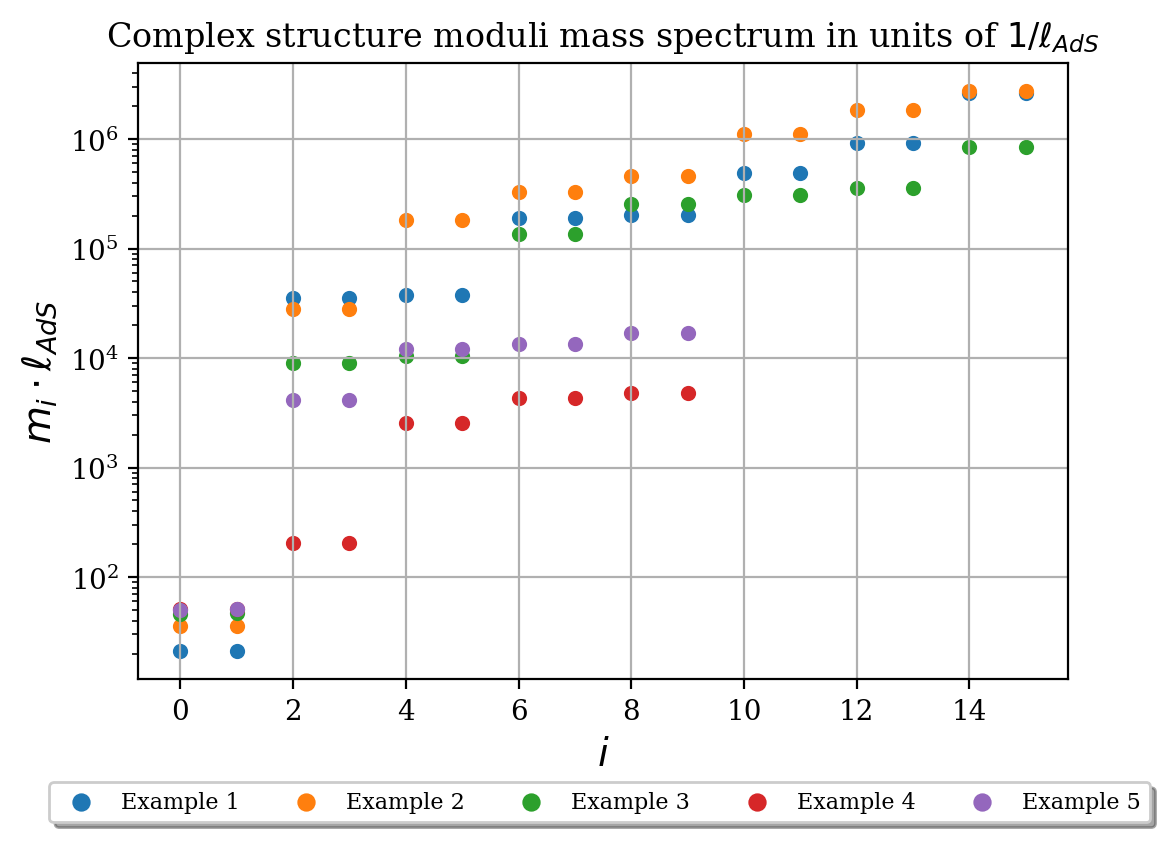

In [3]:
fig = plt.figure(figsize=(6,4),dpi=200)

for i in range(len(df)):
    
    example = df.iloc[i]
    
    h21 = example["h21"]
    
    verify_complex_structure_stabilisation(example)
    
    masses = np.array(example["csm mass spectrum in units of 1/lAdS"])
    
    plt.scatter([i for i in range(2*h21)],masses,s=20,label=str(example["paper name"]).capitalize())
    
    
plt.grid()
plt.ylabel('$m_i\cdot \ell_{AdS}$',fontsize=14)
plt.xlabel('$i$',fontsize=14)
plt.yscale('log')
plt.title('Complex structure moduli mass spectrum in units of $1/\ell_{AdS}$',fontsize=12)
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(1.1, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()


## Verifying Kähler moduli stabilisation in SUSY AdS precursors

In this section, we check the stabilisation of Kähler moduli in the AdS precursors with worldsheet instanton corrections.

----------------------

Example 1 aka Manwe Sulimo, High King of Arda

Input values for gs and W0 at the SUSY minimum:
gs = 0.07321255142562691
W0 = 0.010311191830195512

Maximum |dV|:  5.18157683907993e-25
Maximum ratio |dV/V|:  1.1444906029076214e-06

Computed vacuum energy:  -4.527408810448892e-19
Value expected:  -4.527408810448888e-19
AdS vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor volumes match expected value:  True
Corrected CY volume matches expected value True

Corrected CY volume in Einstein frame:  33041.10042843187

Minimal mass in units of $1/\ell_{AdS}$:  7.327608278609686

----------------------

----------------------

Example 2 aka Lorien, The Dreamer

Input values for gs and W0 at the SUSY minimum:
gs = 0.05954157544132745
W0 = 0.004649441016224453

Maximum |dV|:  1.4598485855772338e-25
Maximum ratio |dV/V|:  2.9798869862090334e-06

Computed vacuum energy:  -4.899006547340343e-20
Value expected:  -4.8990065473403

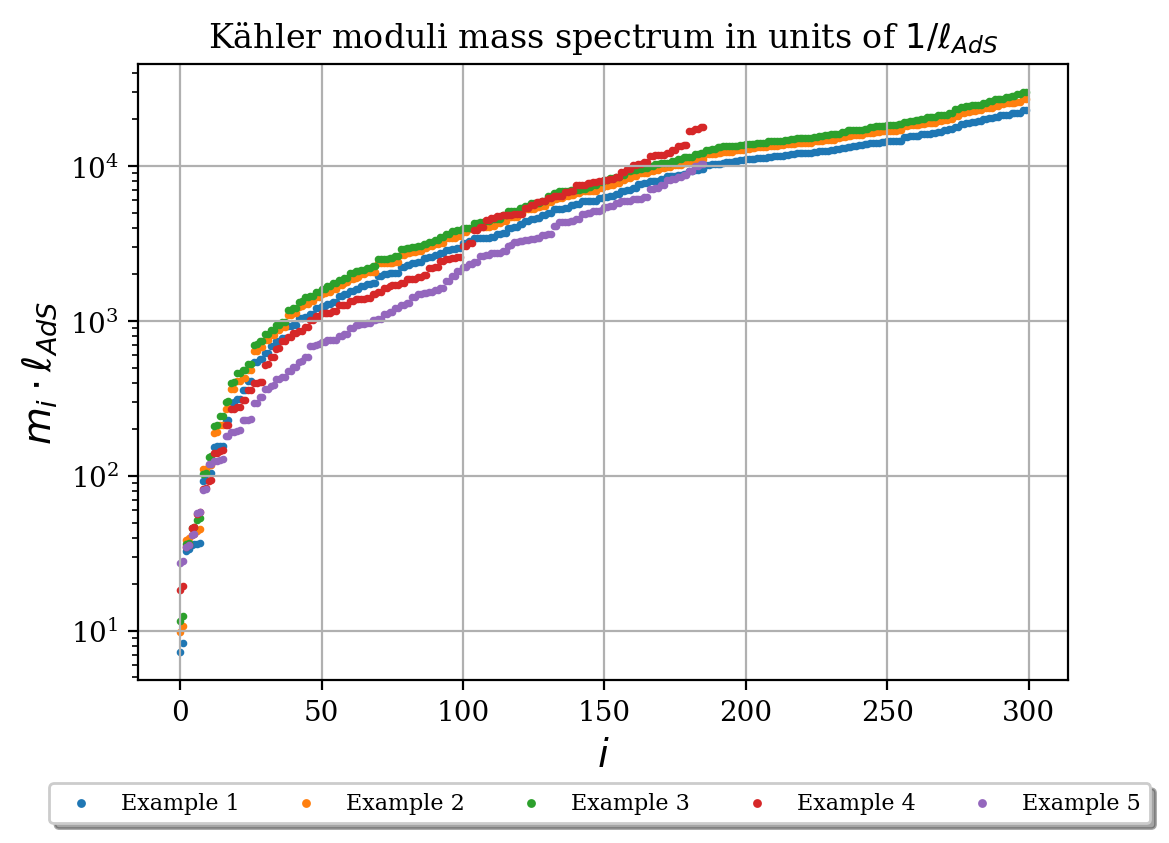

In [4]:
fig = plt.figure(figsize=(6,4),dpi=200)
for i in range(len(df)):
    example = df.iloc[i].copy()
    
    h11 = example["h11"]
    
    verify_SUSY_AdS_minimum(example)
    
    masses = np.array(example["km mass spectrum in units of 1/lAdS"])
    
    print("")
    
    print("Minimal mass in units of $1/\ell_{AdS}$: ",min(masses))
    
    plt.scatter([i for i in range(2*h11)],masses,s=3,label=str(example["paper name"]).capitalize())
    
    print("")
    print("----------------------")
    print("")
    
plt.grid()
plt.ylabel('$m_i\cdot \ell_{AdS}$',fontsize=14)
plt.xlabel('$i$',fontsize=14)
plt.yscale('log')
plt.title('Kähler moduli mass spectrum in units of $1/\ell_{AdS}$',fontsize=12)
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(1.1, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()

## Verifying Kähler moduli stabilisation for dS vacua

Finally, we study the full potential including the uplift contribution from the anti-D3-brane. 

----------------------

Example 1 aka Manwe Sulimo, High King of Arda

Input values for gs and W0:
gs = 0.06569470261013641
W0 = 0.011498101152307332

Maximum |dV|:  7.948885700099203e-26
Maximum ratio |dV/V|:  4.1034340674708637e-07

Computed vacuum energy:  1.9371301133146923e-19
Value expected:  1.9371301133146932e-19
dS vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor volumes match expected value:  True
Corrected CY volume matches expected value True

Corrected CY volume in Einstein frame:  36459.422060021265

Minimal mass in Hubble units:  8.616009097282285

----------------------

----------------------

Example 2 aka Lorien, The Dreamer

Input values for gs and W0:
gs = 0.057086432294056966
W0 = 0.00490197556573315

Maximum |dV|:  2.391315696975055e-26
Maximum ratio |dV/V|:  1.4133468573681907e-06

Computed vacuum energy:  1.6919524634087e-20
Value expected:  1.6919524634086874e-20
dS vacuum energy matches expected value:  True


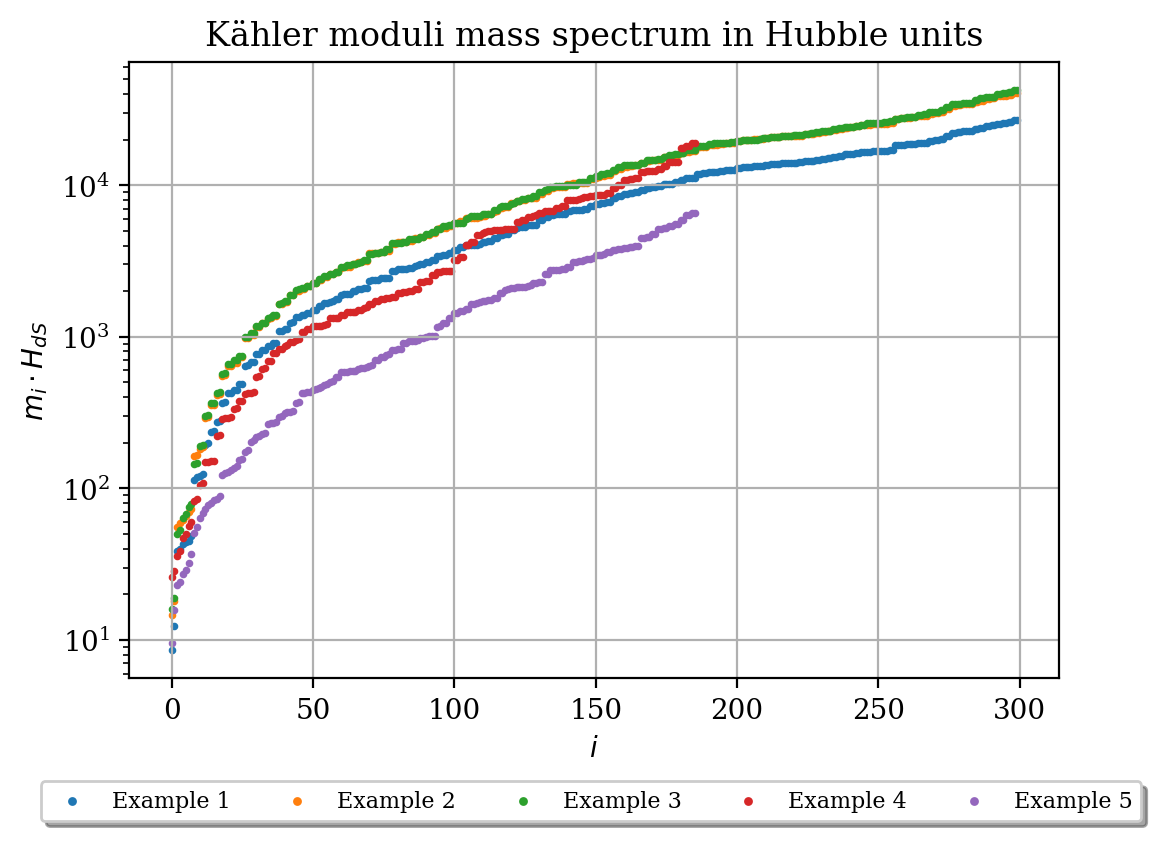

In [5]:
fig = plt.figure(figsize=(6,4),dpi=200)
for i in range(len(df)):
    example = df.iloc[i].copy()
    
   
    verify_uplifted_minimum(example,vacuum_type="dS")
    
    h11 = example["h11"]
    
    masses = np.array(example["km mass spectrum in Hubble units"])
    
    print("")
    
    print("Minimal mass in Hubble units: ",min(masses))
    
    
    plt.scatter([i for i in range(2*h11)],masses,s=3,label=str(example["paper name"]).capitalize())
    
    print("")
    print("----------------------")
    print("")
    
plt.ylabel('$m_i\cdot H_{dS}$')
plt.xlabel('$i$')
plt.yscale('log')
plt.title('Kähler moduli mass spectrum in Hubble units',fontsize=12)
plt.grid()
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(1.1, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()